In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('Electric_Car.csv')



In [25]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


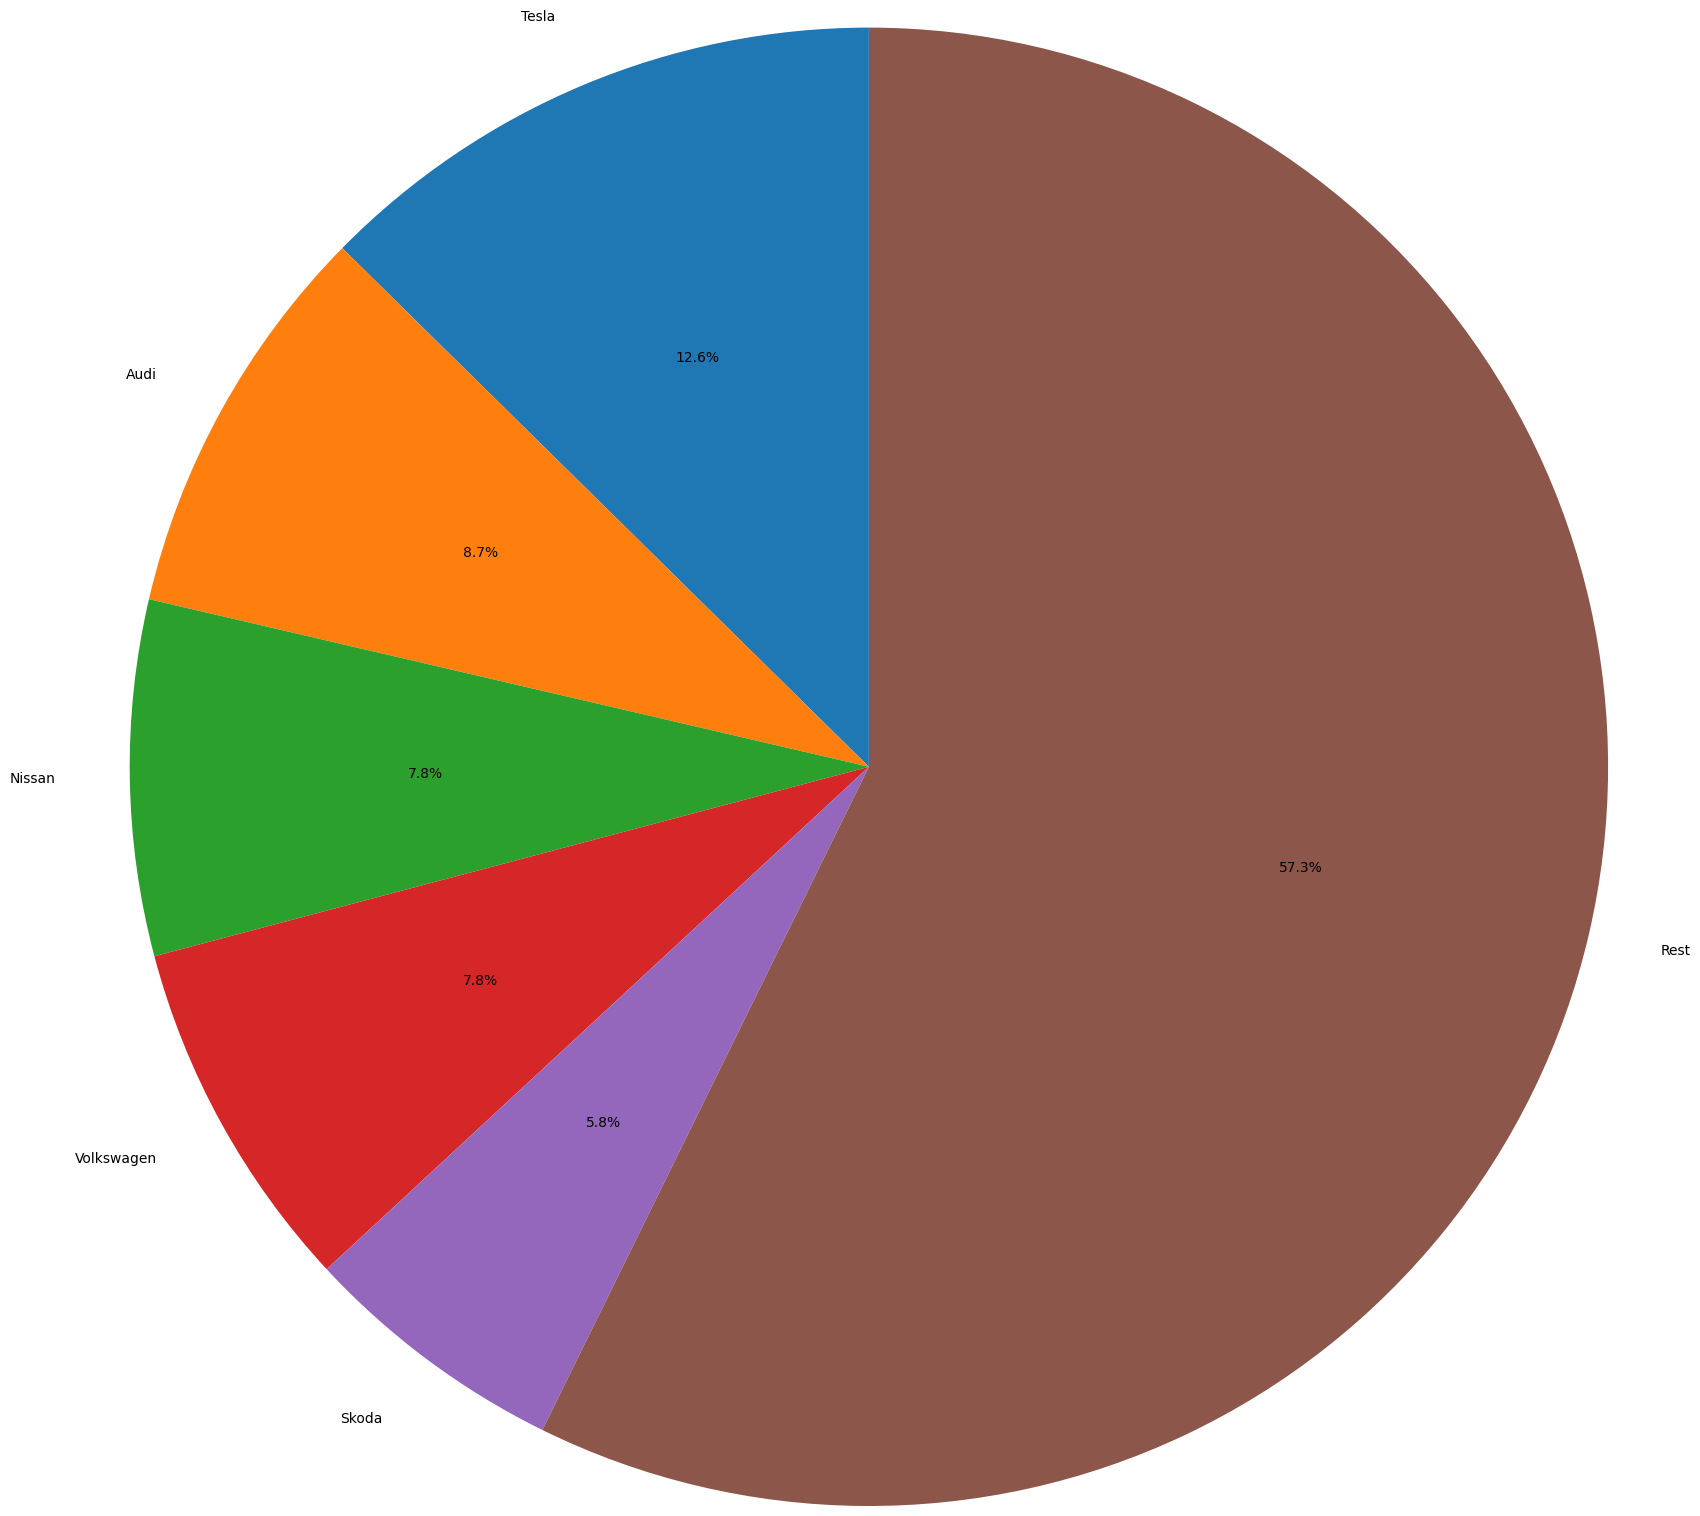

<Figure size 640x480 with 0 Axes>

In [22]:
# Шаг 1: Группировка данных по 'Brand', подсчет количества моделей и сортировка по количеству моделей
model_counts = df.groupby('Brand').size().reset_index(name='Model_Count')
sorted_counts = model_counts.sort_values(by='Model_Count', ascending=False).reset_index(drop=True)

# Шаг 2: Подготовка данных для круговой диаграммы (выбор 5 брендов с наибольшим количеством моделей и остальных как "Other")
top_5 = sorted_counts.head(5)
# Создаем отдельную строку для всех остальных брендов, суммируя их количество моделей
others = pd.DataFrame([{'Brand': 'Rest', 'Model_Count': sorted_counts['Model_Count'][5:].sum()}])
# Объединяем топ-5 брендов и "Rest" в один датафрейм для построения диаграммы
pie_data = pd.concat([top_5, others])

# Шаг 3: Построение круговой диаграммы с увеличенным радиусом и процентами для каждого бренда
fig, ax = plt.subplots(figsize=(8, 8)) # Устанавливаем размер графика
ax.pie(pie_data['Model_Count'], labels=pie_data['Brand'], autopct='%1.1f%%', startangle=90, radius=3) # Устанавливаем радиус = 3

plt.show();

plt.savefig('auto_pie.png') # Сохраняем график как auto_pie.png


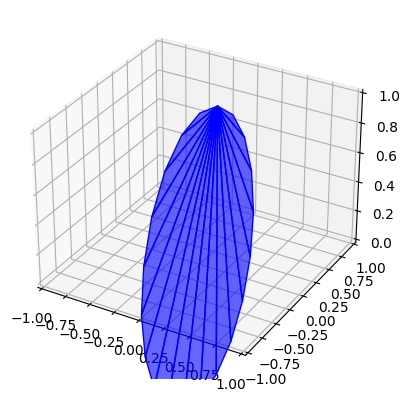

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/cylinder.stl'

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
import trimesh

# Параметры цилиндра
N = 20  # Количество угловых секторов (точек по окружности)
height = 1  # Высота цилиндра
radius = 1  # Радиус основания цилиндра

# Шаг 1: Генерация вершин для нижнего основания цилиндра
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)  # Углы для секторов
base_vertices = np.array([[0, np.cos(angle), np.sin(angle)] for angle in angles])  # Вершины для нижнего основания

# Шаг 2: Генерация вершин для верхнего основания цилиндра
top_vertices = np.array([[height, np.cos(angle), np.sin(angle)] for angle in angles])  # Вершины для верхнего основания

# Объединяем вершины обоих оснований для триангуляции
vertices = np.vstack([base_vertices, top_vertices])

# Шаг 3: Используем триангуляцию Делоне для создания граней цилиндра
tri = Delaunay(vertices[:, 1:])  # Выполняем триангуляцию в плоскости y-z
faces = tri.simplices  # Получаем индексы вершин для граней

# Шаг 4: Создаем сетку и визуализируем цилиндр
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отображаем грани цилиндра
ax.add_collection3d(Poly3DCollection(vertices[faces], color='b', alpha=0.6))

# Устанавливаем границы осей
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, height])

# Показываем график
plt.show()

# Шаг 5: Сохраняем объект цилиндра в формате STL
mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
mesh.export('/mnt/data/cylinder.stl')

In [ ]:
import matplotlib.pyplot as plt
 
import pandas as pd
 
df = pd.read_csv('Electric_Car.csv')
 
# Количество уникальных моделей машин для каждого бренда
sd =
df.groupby(['Brand'])['Model'].count().sort_values(ascending= False)
 
#Выбор
Model для значений более 5 
sd_pd = sd.to_frame().reset_index()
sd_pd_pie=sd_pd[sd_pd['Model']>5]
sd_pd_pie
 
#Выбор
Model для значений менее или равно 5 
sd_rest_count=sd_pd[sd_pd['Model']<=5].sum()
sd_rest_count.iloc[1]
 
#Создание
данных для новой строки с оставшимся количеством Model
newDict=
{"Brand":'Rest',"Model":sd_rest_count.iloc[1]}
 
#Создание
Pandas DataFrame для новой строки
print("New row data is:")
print(newDict)
df1=pd.DataFrame([newDict])
 
#Добавление новой строки
sd_pd_pie =pd.concat([sd_pd_pie,df1])
sd_pd_pie
 
#Проверка
содержимого столбца Brand
sd_pd_pie.Brand
 
#Проверка
содержимого столбца Model
sd_pd_pie.Model
 
#Назначение
переменным данных для построения диаграммы
labels = sd_pd_pie.Brand
sizes = sd_pd_pie.Model
fig = plt.pie(sizes, labels=labels, autopct='%0.1f%%',
radius = 2);
 
#Сохранение
диаграммы в файл
plt.savefig('auto_pie.png')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('Electric_Car.csv')
# Группировка Brand по количеству уникальных моделей
sd = df.groupby(['Brand'])['Model'].count().sort_values(ascending= False)
sd.values
sd.index
#Построение круговой диаграммы количества моделей 
#Определенного бренда
labels = sd.index
y = sd.values
y_pos = np.arange(len(labels))
fig, ax = plt.subplots()
ax.barh(y_pos, y,  align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Количество моделей определенного бренда')
ax.grid()
plt.show()
#Сохранение диаграммы в файл
plt.savefig('auto_barh.png')

In [28]:
import numpy as np
from stl import mesh
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy import spatial
#Функция отображения вершин
def plot_verticles(vertices, isosurf = False):
    #Создание новой графики
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c='r', marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    #Отображение файла или запись файла
    plt.show()
#Функция отображения сетки
def plot_mesh(
    your_mesh,
    size_x=10,
    size_y=10,
    dpi=80):
    # Создание нового 3D-отображения
    figure = plt.figure(figsize=(size_x, size_y), dpi=dpi)
    axes = mplot3d.Axes3D(figure)
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors, edgecolor="black"))
    figure.add_axes(axes)
    #Auto scale к размеру сетки
    scale = your_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    #Отображение и запись графика
    plt.show()
#Вершины верхнего основания цилиндра
vertices = np.array([[0,0,0]])
phi = 0
N=20
#Первый круг
for i in range(0,N):
    vertices_1 = np.array([[0,np.cos(2*np.pi*(i)/N),np.sin(2*np.pi*(i)/N)]])
    vertices =np.append(vertices,vertices_1, axis = 0)

# Второй круг
for i in range(0,N):
    vertices_1 = np.array([[1,np.cos(2*np.pi*(i)/N),np.sin(2*np.pi*(i)/N)]])
    vertices =np.append(vertices,vertices_1, axis = 0)
#Функция создание граней из вершин
hull = spatial.ConvexHull(vertices)
faces = hull.simplices
#Массив faces содержит описание граней

#Создание сетки
cylinder_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cylinder_mesh.vectors[i][j] = vertices[f[j],:]
plot_mesh(cylinder_mesh)
#Запись сетки в файл "cylinder_mesh.stl"
cylinder_mesh.save('cylinder_mesh.stl')

ModuleNotFoundError: No module named 'stl'